# 신경망

신경망의 성질 : **가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습**

## 퍼셉트론에서 신경망으로


### 신경망의 구성
* 입력층
* 은닉층
* 출력층

신경망을 구성하는 층의 갯수를 기준으로 언급할 때는 `3층 신경망`,
가중치를 갖는 층의 갯수를 기준으로 언급할 때는 `2층 신경망`이라고 한다.

### 활성화 함수


* Chapter2에서 출력신호의 세기를 `입력신호의 세기*가중치`의 합으로써 다음과 같이 `y = b + w1*x1 + w2*x2` 로 나타낼 수 있다고 언급했었는데, `b + w1*x1 + w2*x2`를 x에 대한 함수 h(x)로도 표현할 수 있다. 
  * 따라서, 출력신호는 `y = h(x)`와 같이 간결하게 나타낼 수 있다.
* h(x)와 같이 입력 신호의 총합을 출력 신호로 변환하는 함수를 `활성화 함수`라고 한다. 
  * `활성화 함수(activation function)`는 입력신호의 총합이 활성화를 일으키는지 결정하는 역할을 한다.


## 활성화 함수

* 계단 함수 : 임계값을 경계로 출력이 바뀜.
  * 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다.
  * 신경망에서는? 활성화 함수 대신 다른 함수를 이용할 수 있다!

### 시그모이드 함수

`h(x) = 1 / (1 + exp(-x))`


신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다.

#### 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

실수는 인수로 받을 수 있지만, 넘파이 배열을 인수로 넣을 수 없기 때문에 다음과 같이 수정할 필요가 있다.

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
y = x > 0
y

array([False,  True,  True], dtype=bool)

In [5]:
y = y.astype(np.int) # bool 형에서 int 형으로 변환
y

array([0, 1, 1])

#### 계단 함수의 그래프

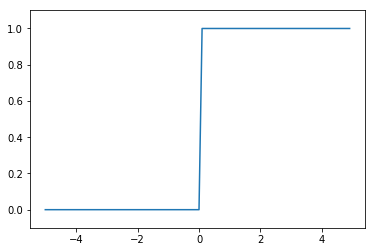

In [6]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0에서 5.0 전까지 0.1 간격의 numpy 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정 y + limit
plt.show()

#### 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

~~Wow, Such awesome broadcast feature, wow~~

브로드캐스트 기능은 numpy 배열과 스칼라값의 연산을 numpy 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하도록 해준다.
##### 브로드캐스트 복습

In [8]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([ 2.,  3.,  4.])

In [9]:
1.0 / t

array([ 1.        ,  0.5       ,  0.33333333])

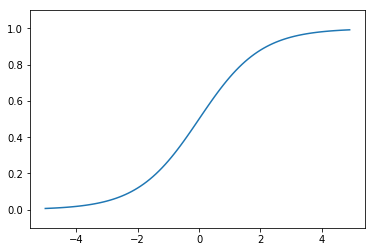

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 시그모이드 함수 VS 계단 함수
* 시그모이드 함수
  * 매끄러운 곡선 모양 
  * 입력에 따라 출력이 연속적으로 변화
* 계단 함수
  * 입력에 따른 급격한 변화. 0 아니면 1
  

입력이 작으면 0에 가깝고, 입력이 커지면 1에 가까워지는 점은 같다.


#### 비선형 함수
시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 분류된다.

* 신경망에서 왜 활성화 함수로 비선형 함수를 사용해야 하는가?
  * 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문
* 선형함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 것.
  * 선형 함수들의 합성함수는 결국에는 선형이다.... 
  * 예시) h(x) = a*x + b, g(x) = c*x + d, f(x) = e*x + t. (h*g*f)(x) = a*c*e*x + b + a*d + a*c*t 
  * 따라서, 층을 쌓는 혜택을 얻으려면 활성화 함수로 비선형 함수를 쓰는게 개이득!

#### ReLU 함수
* Rectified Linear Unit 렐루 함수 : 입력이 0을 넘으면 그대로 출력하고, 0 이하이면 0을 출력하는 함수
  * 요즘은 Sigmoid보다 ReLU를 이용한다!

In [11]:
def relu(x):
    return np.maximum(0, x)

## 다차원 배열의 계산
다차원 배열도 역시 본질적으로 숫자의 집합. 한 줄로 늘어서든(1차원), 직사각형으로 늘어놓든(2차원), 여기서 좀 더 일반화한 N차원으로 나열하든 통틀어서 다차원배열

In [12]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [13]:
np.ndim(A) # 배열의 차원 수를 확인한다

1

In [14]:
A.shape # 배열의 형상

(4,)

In [15]:
A.shape[0]

4

배열의 형상은 튜플로 나타내게 되는데, 이는 1차원 배열이라도 다차원 배열일 때와 통일된 형태로 결과를 반환하기 위함이다.
2차월 배열일때는 (4,3), 3차원 배열일 때는 (4,3,2) 같은 튜플을 반환한다. 

In [16]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [17]:
np.ndim(B)

2

In [18]:
B.shape

(3, 2)

#### 행렬의 곱셈
행렬의 곱셈을 계산할 때는 `np.dot(A, B)`를 이용한다. 수식에서 행렬을 나타낼때 대문자 볼드체로 표기하는게 일반적이기 때문에, 파이썬 코드에서의 변수명과 구별하기 위해 대문자로 표기한다.

In [19]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [20]:
B = np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [21]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

다음은 2X3 행렬과 3X2 행렬의 곱셈을 파이썬으로 구현한 모습이다.

In [22]:
A = np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [23]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [24]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

행렬의 곱셈은 '대응하는 차원의 원소 수를 일치' 시키는 것이 핵심이다.
* 2X'3' 행렬과 '3'X2 행렬의 곱셈은 성립하지만, 2X'2' 행렬과 '1'X3 행렬의 곱셈은 성립하지 않는다.

#### 신경망의 내적

In [25]:
X = np.array([1,2]) # 입력 신호
X.shape

(2,)

In [26]:
W = np.array([[1,3,5],[2,4,6]]) # 가중치
print(W)

[[1 3 5]
 [2 4 6]]


In [27]:
W.shape

(2, 3)

In [28]:
Y = np.dot(X, W)

In [29]:
print(Y)

[ 5 11 17]


## 3층 신경망 구현하기

#### 표기법 설명

가중치 : 앞층의 i번째 뉴런에서 다음층(n층)의 j번째 뉴런에 대한 가중치?
* 윗첨자의 n : n층의 가중치라는 뜻
* 아랫첨자의 첫번째 j : 다음층의 j번째 뉴런으로 향한다는 뜻(다음층 뉴런의 인덱스)
* 아랫첨자의 두번째 i : 앞층의 i번째 뉴런에서 나온다는 뜻(앞층 뉴런의 인덱스)

뉴런
* 윗첨자의 n : n층의 뉴런이라는 뜻
* 아랫첨자의 i : n번째 층의 i번째 뉴런이라는 뜻

#### 각 층의 신호 전달 구현하기

In [30]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [31]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [32]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [33]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [36]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forword(network, x)
print(y)

[ 0.31682708  0.69627909]


## 출력층 설계하기

### 항등함수와 소프트맥스 함수 구현하기
* 항등함수 : 그냥 입력받은거 그대로 출력하는거


아 몰랑 암튼 소프트맥스 구현해보자


In [37]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 소프트맥스 함수 구현 시 주의할 점


In [38]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c) # 오버플로 대책 
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수의 특징
* 출력의 총합은 1 <- 이건 너무 당연함
  * 덕분에, 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.
* 소프트맥스 함수는 단조 증가 함수이기 때문에, 원소 간의 대소관계는 변하지 않는다.

### 출력층의 뉴런 수 정하기
출력층의 뉴런 수는 문제에 맞게 적절히 정해야함.
분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적


## 손글씨 숫자 인식

### MNIST 데이터셋


In [40]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [42]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [45]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [47]:
import pickle

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt / len(x))) )

Accuracy:0.9352


In [49]:
x, y = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt)/ len(x)))

Accuracy:0.9352


In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [12]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.9])
y = forward(network, x)
print(y)

[ 0.31908255  0.70129205]


## 출력층 설계하기

### 항등 함수, 소프트맥스 함수 